## Gerekli kütüphanelerin kurulması

In [ ]:
!pip install numpy
!pip install tensorflow

### Keras kütüphanesinin yüklü olduğunun kontrolü

In [ ]:
!pip show keras

### Kütüphanelerin kullanılmak üzere içeri aktarılması

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))


### TensorFlow ve Keras'ın birlikte içeri aktarılması

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

### Sequential (Sıralı) model kullanımı

In [ ]:
# 3 katmanlı sıralı model oluşturma
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
y = model(x)

In [ ]:
x

In [ ]:
y

In [ ]:
model.layers

In [ ]:
model.summary()

In [ ]:
model2 = keras.Sequential()
model2.add(layers.Dense(2, activation="relu", input_shape=(4,)))

model2.summary()

In [ ]:
model3 = keras.Sequential()
model3.add(keras.Input(shape=(250, 250, 3)))  # 250x250 RGB görüntü
model3.add(layers.Conv2D(32, 5, strides=2, activation="relu"))
model3.add(layers.Conv2D(32, 3, activation="relu"))
model3.add(layers.MaxPooling2D(3))

model3.summary()

In [ ]:
from keras.models import Sequential 
from keras.layers import Activation, Dense 

model = Sequential() 
model.add(Dense(16, input_shape = (8,)))
model.summary()

### Sıfırdan Bir Ağ Kurulumu

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu',use_bias=True, input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#fully connected işlemi, 2 hidden layers
model.add(Flatten())
model.add(Dense(512, activation = 'relu',use_bias=True))
model.add(Dense(2, activation = 'relu',use_bias=True))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

## Fashion MNIST Veri Seti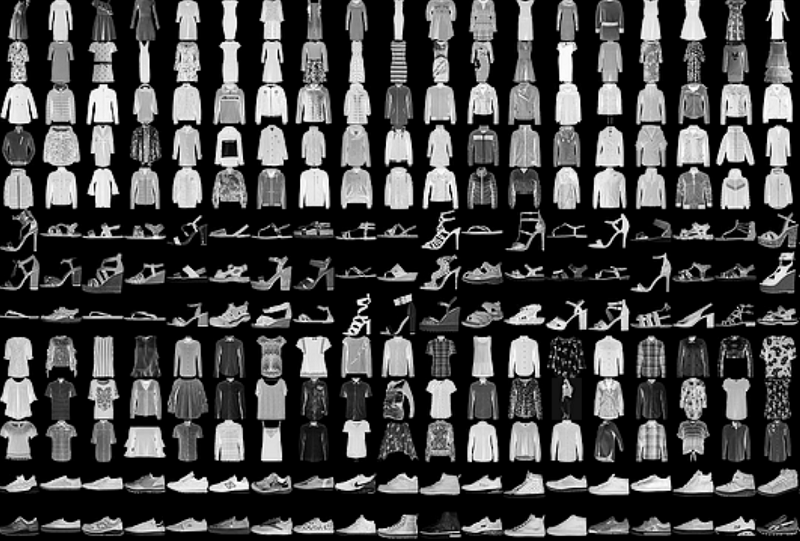

Fashion-MNIST, Zalando'nun makale görüntülerinin bir veri setidir—60.000 örneklik bir eğitim seti ve 10.000 örneklik bir test setinden oluşur. Her örnek, 10 sınıftan bir etiketle ilişkilendirilmiş 28x28 gri tonlamalı bir görüntüdür. 

Orijinal MNIST veri seti, çok sayıda el yazısı rakam içerir. AI/ML/Data Science topluluğunun üyeleri bu veri kümesini sever ve algoritmalarını doğrulamak için bir kıyaslama noktası olarak kullanır. Aslında, MNIST genellikle araştırmacıların denediği ilk veri kümesidir. "MNIST'te çalışmıyorsa hiç çalışmaz" dedikleri için çok sık kullanılmaktadır.


---

### **Etiketler**

Her eğitim ve test örneği, aşağıdaki etiketlerden birine atanır:

0. Tişört/üst
1. Pantolon
2. Kazak
3. Elbise
4. Ceket
5. Sandalet
6. Gömlek
7. Spor Ayakkabı
8. Çanta
9. Bot


## Kütüphanelerin İçeriye Aktarılması

In [ ]:
import os
import warnings
import numpy as np
import pylab as pl
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
from keras import backend as K
import matplotlib.pyplot as plt
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import Sequential
from keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten

## Veri Setinin İçeriye Aktarılması

In [ ]:
warnings.simplefilter("ignore")
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train

## Verinin Ön İşlenmesi (Preprocessing)
### Verinin Hazırlanma Fonksiyonu

In [ ]:
def prepare_data(X, size, channels):
    X = X.reshape(X.shape[0], size, size, channels)
    X = X.astype("float32")
    return X/255.

### Parametrelerin Ayarlanması

In [ ]:
nb_classes = 10
size = 28
channels = 1
class_names = ['tshirt','trouser','pullover', 'dress', 'coat','sandal', 'shirt','sneaker','bag','boot']

### Verilen kanala ve boyuta göre X için train ve test verilerinin hazırlanması

In [ ]:
X_train = prepare_data(X_train, size, channels)
X_test = prepare_data(X_test, size, channels)

In [ ]:
X_train

In [ ]:
X_test

### Sınıf vektörünü kategorik olarak var olan verilerin ikili sınıf matrisine dönüştürülmesi

In [ ]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
Y_train

In [ ]:
Y_test

### Eğitim ve test verilerinin boyutlarına erişilmesi

In [ ]:
print("x_train size:", X_train.shape, 
      "\n", "x_test size:", X_test.shape, 
      "\n", "y_train size:", Y_train.shape, 
      "\n","y_test size:", Y_test.shape)

### Model Katmanlarının İnşa Edilmesi

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(
    size, size, channels), kernel_initializer='he_uniform', padding='same'))
convout1 = Activation('relu')
model.add(convout1)
model.add(Conv2D(32, (3, 3), activation='relu',
          kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu',
          kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',
          kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu',
          kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',
          kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
D1 = (Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(D1)
D2 = (Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(D2)
model.add(Dense(10, activation='softmax'))
model.summary()

### Modelin Derlenmesi

In [ ]:
# Önceki çalıştırmalardan tüm logları temizle
!rm -rf ./logs/ 

In [ ]:
# TensorBoard notebook uzantısını yükleyin
%reload_ext tensorboard

In [ ]:
import datetime

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy',
              metrics=['accuracy'])


### Modelin Eğitilmesi ve Değerlendirilmesi

In [ ]:
model.fit(X_train, Y_train,
          batch_size=32,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test))
score = model.evaluate(X_test,
                       Y_test,
                       verbose=0)

### Test sonuç doğruluğunun yazdırılması

In [ ]:
print('Test accuracy:', score[1])

### Tahmin edilen modele göre ısı haritalı karmaşıklık matrisi oluşturma

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=1)
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="YlGnBu", annot=True)
plt.title('Confusion Matrix')

### Sınıflandırma raporu hazırlama

In [ ]:
print(classification_report(y_test, y_pred))